In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## EDA

In [2]:
df=pd.read_csv("desktop/py_files/data/kc_house_data.csv")

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.shape

(21613, 21)

In [5]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [7]:
df.drop(["id","date"],axis=1,inplace=True) #dropping unnecesarry columns

In [8]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## DATA VISUALIZATION

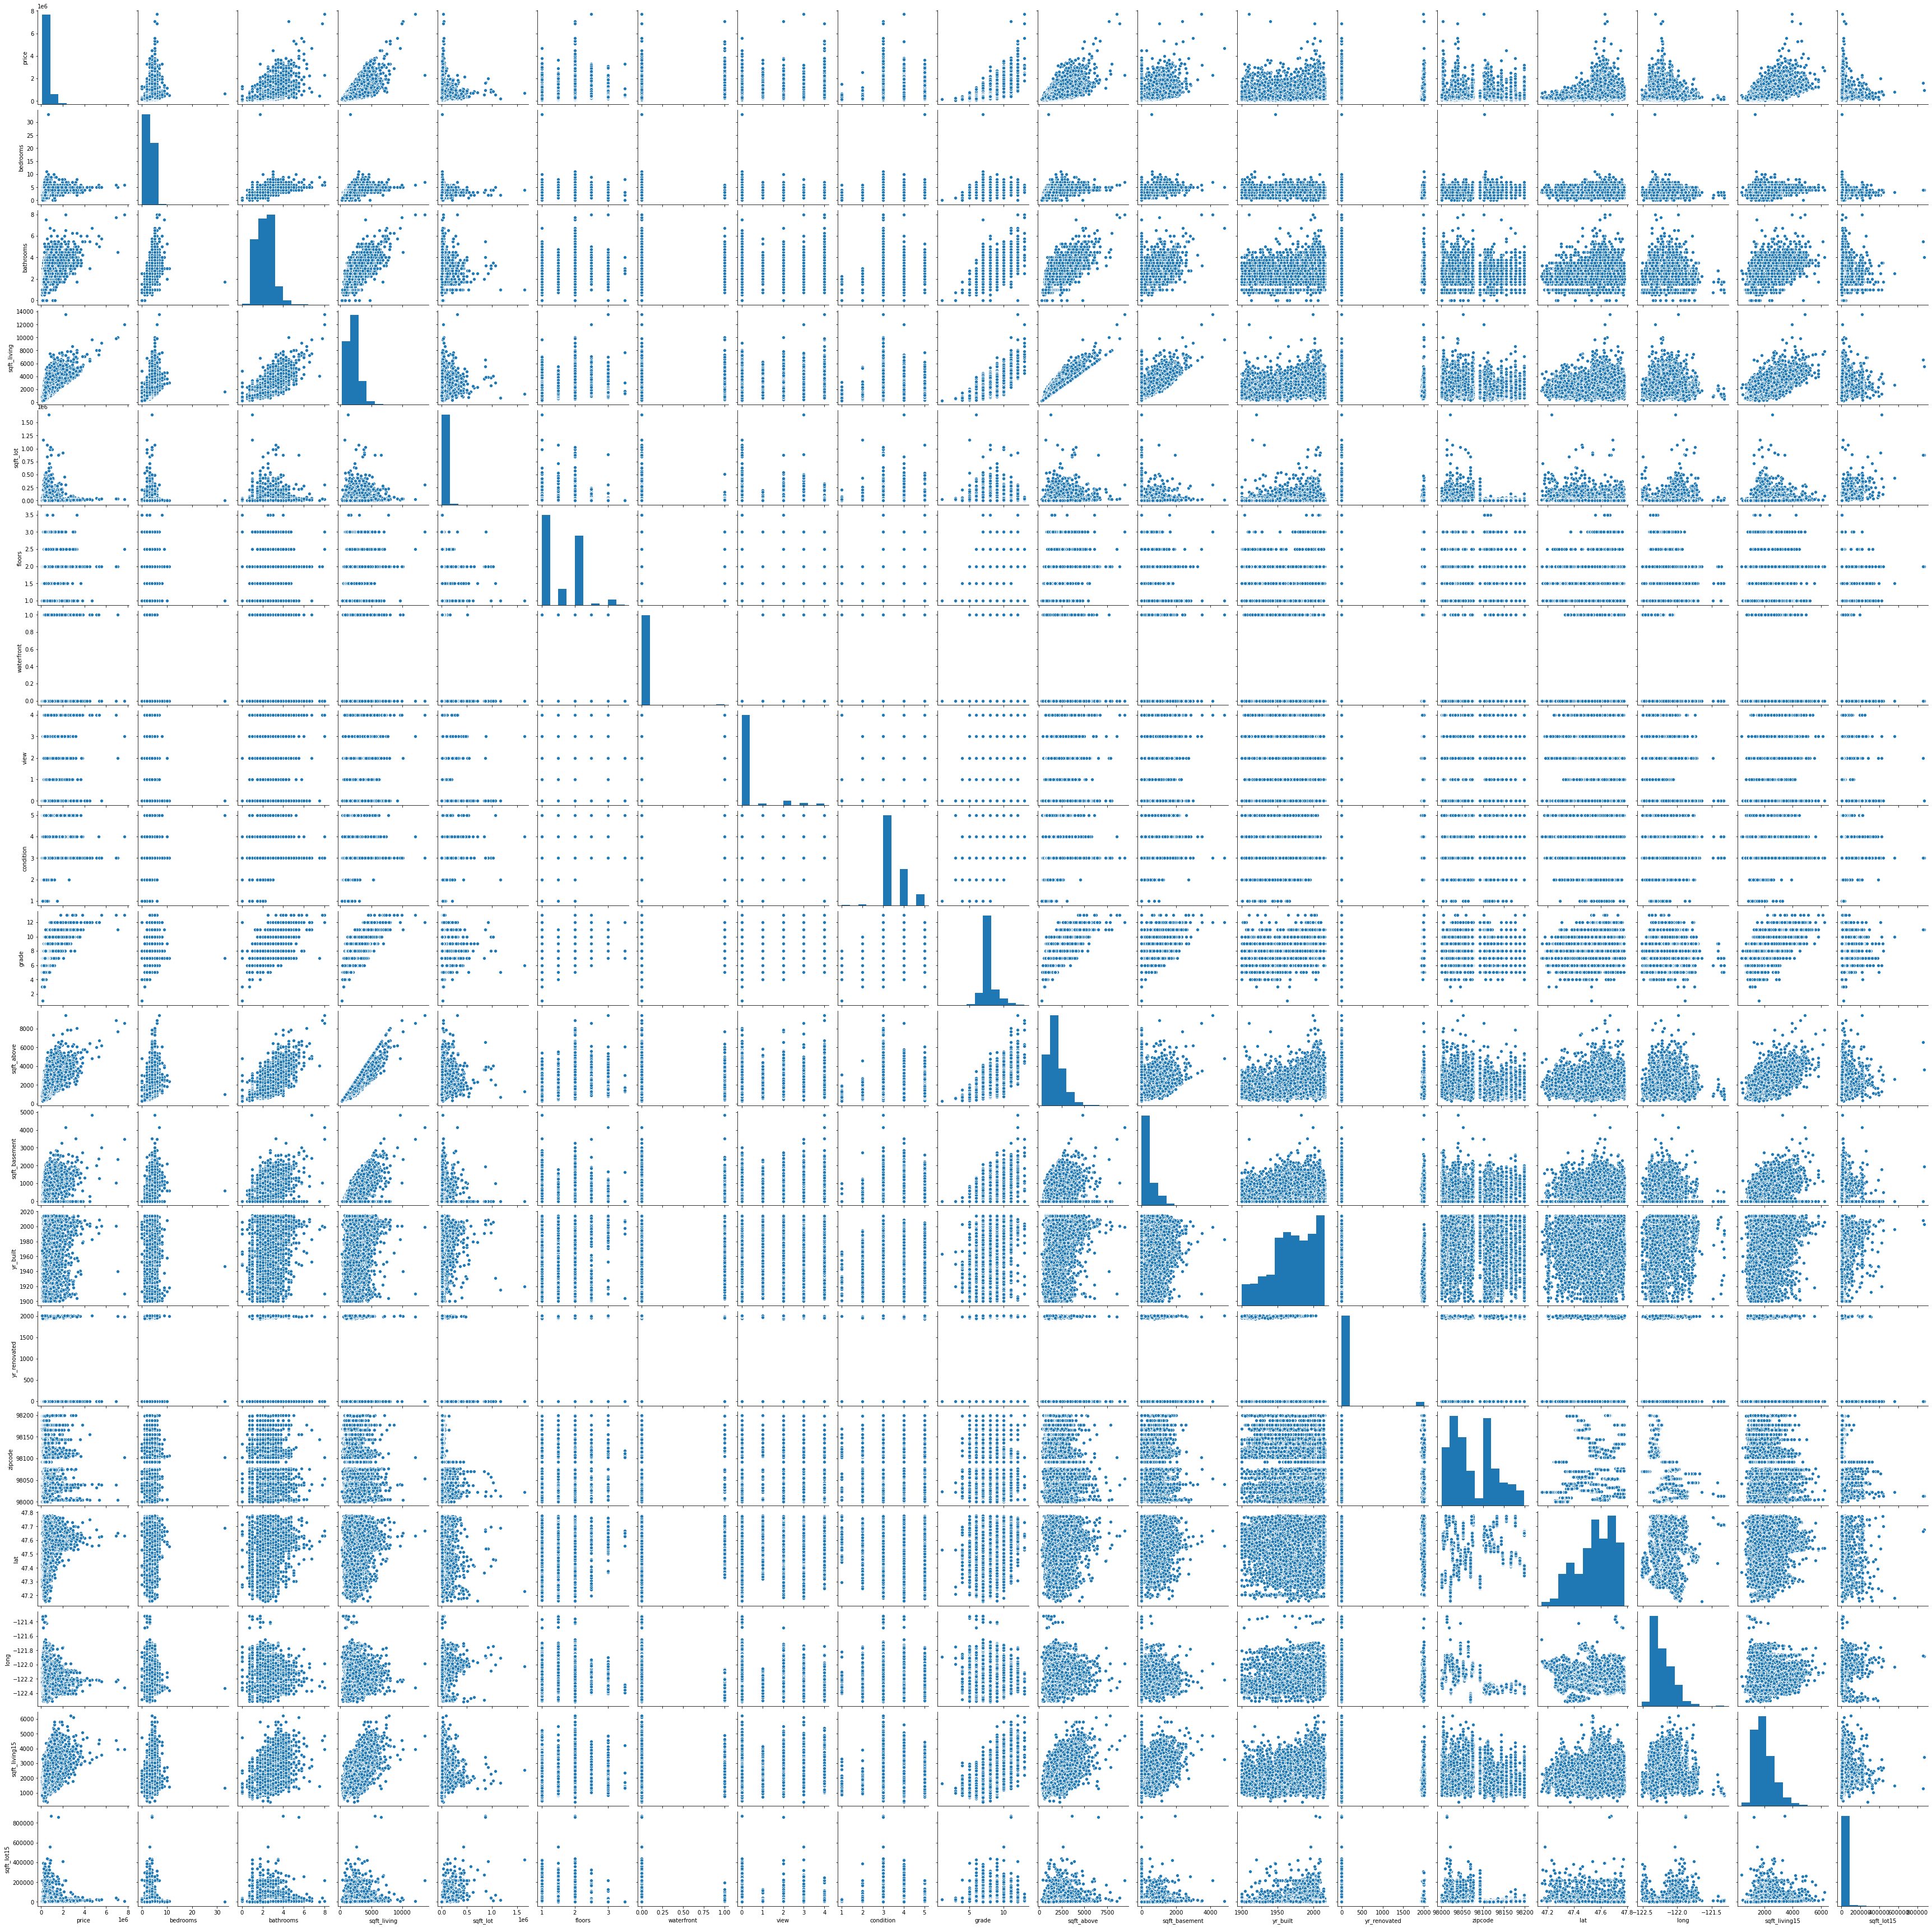

In [9]:
sns.pairplot(df)
#plotting all the variables aganist each other

<AxesSubplot:>

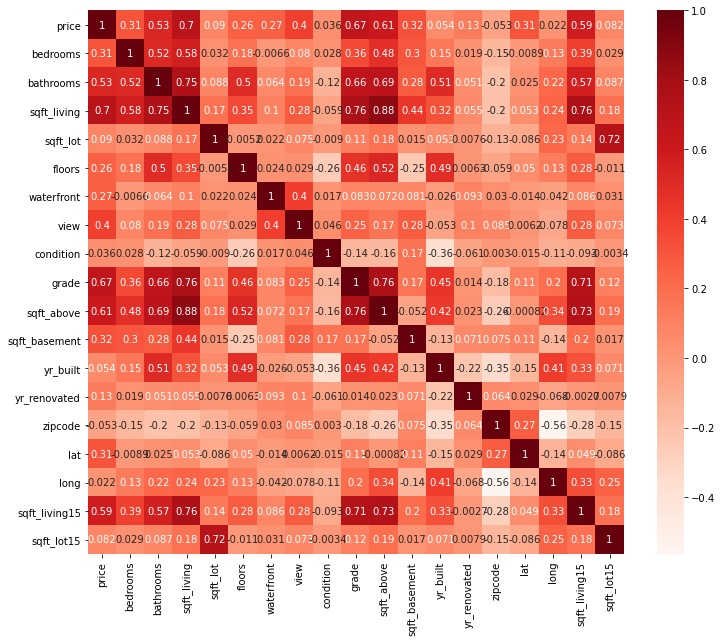

In [11]:
fig=plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True,cmap="Reds")
#Checking the relation among our data(s) through a heat map

## MODEL TRAINING

In [17]:
#splitting our data
x=df.iloc[:,1:]
y=df.iloc[:,0]#target variable
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.7,random_state = 0)

In [18]:
#applying simple linear_regression
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [25]:
#checking our model score:
print("Our model_score is: ",model.score(x_test,y_test))
#checking r2 score:
y_pred=model.predict(x_test)
from sklearn.metrics import r2_score
print("R2 score is:",r2_score(y_test, y_pred))

Our model_score is:  0.6877902899299462
R2 score is: 0.6877902899299462


In [29]:
#applying lasso regression
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
ls=Lasso()
params={"alpha":[0.001,0.002,1,10,20,20,40,50,100]}
lreg=GridSearchCV(ls,params,cv=3)
lreg.fit(x_train,y_train)

y_train_pred = lreg.predict(x_train)
y_test_pred = lreg.predict(x_test)

print(lreg.score(x_test,y_test))

c:\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 175697532284789.72, tolerance: 135900344636.45245
  model = cd_fast.enet_coordinate_descent(
c:\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 173688830386707.88, tolerance: 128238293442.96072
  model = cd_fast.enet_coordinate_descent(
c:\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 193883760723623.1, tolerance: 140399004352.7087
  model = cd_fast.enet_coordinate_descent(
c:\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not

0.6877836138925092


c:\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 273598459141778.44, tolerance: 202270218611.51257
  model = cd_fast.enet_coordinate_descent(


In [36]:
#playing with grid_search_cv params
print("Best model score:",lreg.best_score_)
print("Best value of alpha:",lreg.best_params_)

Best model score: 0.700407121750234
Best value of alpha: {'alpha': 50}
